# import packages
Let's start by importing the following packages!
* requests
* BeautifulSoup
* seaborn
* matplotlib
* pandas
* re

In [1]:
# import package
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from bs4 import BeautifulSoup

# crawler THSR information
Let's start to crawl the imformation of each station of THSR!
* Target web: [THSR Homepage](https://www.thsrc.com.tw)  
* Choose each station:
    1. Homepage -> Travel Information -> Stations
    2. choose different stations by changing url
* Task:
    1. crawler the name, address, operation hours and ticketing hours of each station
    2. organize into a DataFrame

In [2]:
url = 'https://www.thsrc.com.tw/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
#print(soup.prettify())

In [3]:
# setting each station name and their url

stations_name = ['南港', '台北', '板橋', '桃園', '新竹', '苗栗', '台中', '彰化', '雲林', '嘉義', '台南', '左營']
assert len(stations_name) == 12

stations_url = []
for i in soup.find_all(class_='menu-lv3'):
    for j in i.find_all('a'):
        if j.string[:-1] in stations_name:
            whole_url = url + j['href']
            stations_url.append(whole_url)
assert len(stations_url) == 12

In [4]:
stations_name

['南港', '台北', '板橋', '桃園', '新竹', '苗栗', '台中', '彰化', '雲林', '嘉義', '台南', '左營']

In [5]:
stations_url

['https://www.thsrc.com.tw//ArticleContent/2f940836-cedc-41ef-8e28-c2336ac8fe68',
 'https://www.thsrc.com.tw//ArticleContent/977abb69-413a-4ccf-a109-0272c24fd490',
 'https://www.thsrc.com.tw//ArticleContent/e6e26e66-7dc1-458f-b2f3-71ce65fdc95f',
 'https://www.thsrc.com.tw//ArticleContent/fbd828d8-b1da-4b06-a3bd-680cdca4d2cd',
 'https://www.thsrc.com.tw//ArticleContent/a7a04c89-900b-4798-95a3-c01c455622f4',
 'https://www.thsrc.com.tw//ArticleContent/e8fc2123-2aaf-46ff-ad79-51d4002a1ef3',
 'https://www.thsrc.com.tw//ArticleContent/3301e395-46b8-47aa-aa37-139e15708779',
 'https://www.thsrc.com.tw//ArticleContent/38b8c40b-aef0-4d66-b257-da96ec51620e',
 'https://www.thsrc.com.tw//ArticleContent/5f4c7bb0-c676-4e39-8d3c-f12fc188ee5f',
 'https://www.thsrc.com.tw//ArticleContent/60831846-f0e4-47f6-9b5b-46323ebdcef7',
 'https://www.thsrc.com.tw//ArticleContent/9c5ac6ca-ec89-48f8-aab0-41b738cb1814',
 'https://www.thsrc.com.tw//ArticleContent/f2519629-5973-4d08-913b-479cce78a356']

In [6]:
# crawler the address of each station
stations_address = []
for each_url in stations_url:
    response = requests.get(each_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    for each_class in soup.find_all(class_='google-map-link orange'):
        stations_address.append(each_class.text)
assert len(stations_address) == 12

In [7]:
stations_address

['台北市南港區南港路一段313號',
 '台北市北平西路3號',
 '新北市板橋區縣民大道二段7號',
 '桃園市中壢區高鐵北路一段6號',
 '新竹縣竹北市高鐵七路6號',
 '苗栗縣後龍鎮高鐵三路268號',
 '台中市烏日區站區二路8號',
 '彰化縣田中鎮站區路二段99號',
 '雲林縣虎尾鎮站前東路301號',
 '嘉義縣太保市高鐵西路168號',
 '台南市歸仁區歸仁大道100號',
 '高雄市左營區高鐵路105號']

In [8]:
# crawler the operation hours and ticketing hours of each station
stations_op_hours = []
stations_tic_hours = []
for each_url in stations_url:
    response = requests.get(each_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    for each_class in soup.find_all(class_='gray'):
        if each_class.string != None:
            if each_class.string[:5] == '營業時間：':
                stations_op_hours.append(each_class.string[5:])
            elif each_class.string[:5] == '售票時間：':
                tic_hour = each_class.string[5:].replace(' ', '')
                stations_tic_hours.append(tic_hour)

In [9]:
stations_op_hours

['05:50 ~ 24:00',
 '06:00 ~ 24:00',
 '06:00 ~ 24:00',
 '06:20 ~ 23:45',
 '06:15 ~ 23:45',
 '06:05 ~ 23:45',
 '05:40 ~ 24:00',
 '06:20 ~ 24:00',
 '06:15 ~ 23:45',
 '06:00 ~ 23:45',
 '05:45 ~ 24:00',
 '05:25 ~ 24:00']

In [10]:
stations_tic_hours

['05:50~末班車發車時間',
 '06:00~末班車發車時間',
 '06:00~末班車發車時間',
 '06:20~末班車發車時間',
 '06:15~末班車發車時間',
 '06:05~末班車發車時間',
 '05:40~末班車發車時間',
 '06:20~末班車發車時間',
 '06:15~末班車發車時間',
 '06:00~末班車發車時間',
 '05:45~末班車發車時間',
 '05:25~末班車發車時間']

In [11]:
# create a DataFrame
df = pd.DataFrame({'station': stations_name, 
                   'address': stations_address, 
                   'operation_hours': stations_op_hours, 
                   'ticketing_hours': stations_tic_hours})
df

,station,address,operation_hours,ticketing_hours
0,南港,台北市南港區南港路一段313號,05:50 ~ 24:00,05:50~末班車發車時間
1,台北,台北市北平西路3號,06:00 ~ 24:00,06:00~末班車發車時間
2,板橋,新北市板橋區縣民大道二段7號,06:00 ~ 24:00,06:00~末班車發車時間
3,桃園,桃園市中壢區高鐵北路一段6號,06:20 ~ 23:45,06:20~末班車發車時間
4,新竹,新竹縣竹北市高鐵七路6號,06:15 ~ 23:45,06:15~末班車發車時間
5,苗栗,苗栗縣後龍鎮高鐵三路268號,06:05 ~ 23:45,06:05~末班車發車時間
6,台中,台中市烏日區站區二路8號,05:40 ~ 24:00,05:40~末班車發車時間
7,彰化,彰化縣田中鎮站區路二段99號,06:20 ~ 24:00,06:20~末班車發車時間
8,雲林,雲林縣虎尾鎮站前東路301號,06:15 ~ 23:45,06:15~末班車發車時間
9,嘉義,嘉義縣太保市高鐵西路168號,06:00 ~ 23:45,06:00~末班車發車時間


# Crawler GDP and CPI
Let's start to crawl GDP and CPI!
* Target web: 
    1. [Wiki GDP](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))  
    2. [Wiki CPI](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index)
* Task:
    1. crawler GDP table (top 50: United States ~ New Zealand)
    2. organize into a DataFrame (columns: Country, Region, IMF_Estimate, IMF_Year, United_Nations_Estimate, United_Nations_Year, World_Bank_Estimate, World_Bank_Year)
    3. crawler CPI table which contains country and 2020 CPI (top 100: Denmark ~ Suriname)
    4. organize into a DataFrame (columns: Country, CPI_2020)
    5. merge GDP(DataFrame) and CPI(DataFrame), based on Country of GDP
    6. plot and text the names of GDP top 10 countrys

In [12]:
# crawler GDP
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [13]:
all = []
for i in soup.find_all('table'):
    for j in i.find_all('td'):
        if len(j.text) < 25 and len(j.text) > 1:
            all.append(j.text.strip())

Country = []
Region = []
IMF_Estimate = []
IMF_Year = []
United_Nations_Estimate = []
United_Nations_Year = []
World_Bank_Estimate = []
World_Bank_Year = []
for i in range(0, 50*8, 8):
    #print(f'{all[i]} & {all[i+1]} & {all[i+2]} & {all[i+3][-1:-5:-1][::-1]} & {all[i+4]} & {all[i+5][-1:-5:-1][::-1]} & {all[i+6]} & {all[i+7]}')
    Country.append(all[i])
    Region.append(all[i+1])
    IMF_Estimate.append(all[i+2])
    IMF_Year.append(all[i+3][-1:-5:-1][::-1])
    United_Nations_Estimate.append(int(all[i+4].replace(',', '')))
    United_Nations_Year.append(all[i+5][-1:-5:-1][::-1])
    World_Bank_Estimate.append(int(all[i+6].replace(',', '')))
    World_Bank_Year.append(all[i+7])

In [14]:
# create GDP DataFrame
GDP = pd.DataFrame({
    'Country': Country, 
    'Region': Region, 
    'IMF_Estimate': IMF_Estimate, 
    'IMF_Year': IMF_Year, 
    'United_Nations_Estimate': United_Nations_Estimate, 
    'United_Nations_Year': United_Nations_Year, 
    'World_Bank_Estimate': World_Bank_Estimate, 
    'World_Bank_Year': World_Bank_Year})
GDP

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year
0,United States,Americas,"22,675,271",2021,21433226,2019,20936600,2020
1,China,Asia,"16,642,318",2021,14342933,2019,14722731,2020
2,Japan,Asia,"5,378,136",2021,5082465,2019,4975415,2020
3,Germany,Europe,"4,319,286",2021,3861123,2019,3806060,2020
4,United Kingdom,Europe,"3,124,650",2021,2826441,2019,2707744,2020
5,India,Asia,"3,049,704",2021,2891582,2019,2622984,2020
6,France,Europe,"2,938,271",2021,2715518,2019,2603004,2020
7,Italy,Europe,"2,106,287",2021,2003576,2019,1886445,2020
8,Canada,Americas,"1,883,487",2021,1741496,2019,1643408,2020
9,South Korea,Asia,"1,806,707",2021,1646539,2019,1630525,2020


In [15]:
# crawler CPI
url = 'https://en.wikipedia.org/wiki/Corruption_Perceptions_Index'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [16]:
countriesCPI = []
indexCPI = []
for i in soup.find_all('table')[4].find_all('td')[1:1890:19]:
    #print(i.text.strip(), '##')
    countriesCPI.append(i.text.strip())
assert len(countriesCPI) == 100

for i in soup.find_all('table')[4].find_all('td')[2:1890:19]:
    #print(i.text.strip(), '##')
    indexCPI.append(int(i.text.strip()))
assert len(indexCPI) == 100

In [17]:
# CPI DataFrame
CPI = pd.DataFrame({
    'Country': countriesCPI, 
    'CPI_2020': indexCPI
})
CPI

,Country,CPI_2020
0,Denmark,88
1,New Zealand,88
2,Finland,85
3,Singapore,85
4,Sweden,85
...,...,...
95,Kazakhstan,38
96,Peru,38
97,Serbia,38
98,Sri Lanka,38


In [18]:
# merge GDP and CPI DataFrame
for country in GDP.Country:
    if country not in list(CPI.Country):
        GDP.drop(GDP[GDP.Country == country].index, inplace=True)
GDP_CPI = pd.merge(GDP, CPI, on='Country')
GDP_CPI

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year,CPI_2020
0,United States,Americas,"22,675,271",2021,21433226,2019,20936600,2020,67
1,China,Asia,"16,642,318",2021,14342933,2019,14722731,2020,42
2,Japan,Asia,"5,378,136",2021,5082465,2019,4975415,2020,74
3,Germany,Europe,"4,319,286",2021,3861123,2019,3806060,2020,80
4,United Kingdom,Europe,"3,124,650",2021,2826441,2019,2707744,2020,77
5,India,Asia,"3,049,704",2021,2891582,2019,2622984,2020,40
6,France,Europe,"2,938,271",2021,2715518,2019,2603004,2020,69
7,Italy,Europe,"2,106,287",2021,2003576,2019,1886445,2020,53
8,Canada,Americas,"1,883,487",2021,1741496,2019,1643408,2020,77
9,South Korea,Asia,"1,806,707",2021,1646539,2019,1630525,2020,61


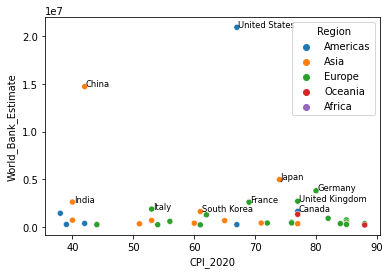

In [19]:
# plot
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
sns.scatterplot(x='CPI_2020', y='World_Bank_Estimate', data=GDP_CPI, hue='Region')
for line in range(0, 10): # top 10 countries
     plt.text(GDP_CPI.CPI_2020[line]+0.2, 
              GDP_CPI.World_Bank_Estimate[line], 
              GDP_CPI.Country[line], 
              horizontalalignment='left', 
              size='small', 
              color='black')
plt.show()